<a href="https://colab.research.google.com/github/Ruchit22solanki/Minimum-Wireless-Charger-Placement-with-Individual-Energy-Requirement/blob/main/PIO_greedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random 
import math
import matplotlib.pyplot as plt 

In [ ]:
class Sensor :
  count_sensors=0
  total_sensors=100
  def __init__(self,x,y,req_charging_level,charging_level=0):
    self.x=x
    self.y=y
    self.req_charging=req_charging_level
    self.curr_charging=0

  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)
    
  def dist(self,point):
    return math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)



In [ ]:
class Charger :
  charger_energy=6000
  radius=70
  gain=2
  min_power=(gain*2.5*charger_energy)/((radius+15)**2)
  total_chargers=1000
  def __init__(self,x,y):
    self.x=x
    self.y=y
  
  def __eq__(self,point):
    if self.x==point.x and self.y==point.y:
      return True
    return False 

  def __hash__(self):
    return hash(self.x+self.y)
    
  def charging_level(self,point):
    dist=math.sqrt((self.x-point.x)**2+(self.y-point.y)**2)
    p_rx=(2.5*self.charger_energy)/((dist+15)**2)
    p_in=-0.00001*(p_rx**2)+0.57*p_rx+10
    return p_in//self.min_power 

  def check_dist(self,point):
    return (math.sqrt((self.x-point.x)**2+(self.y-point.y)**2))<=self.radius

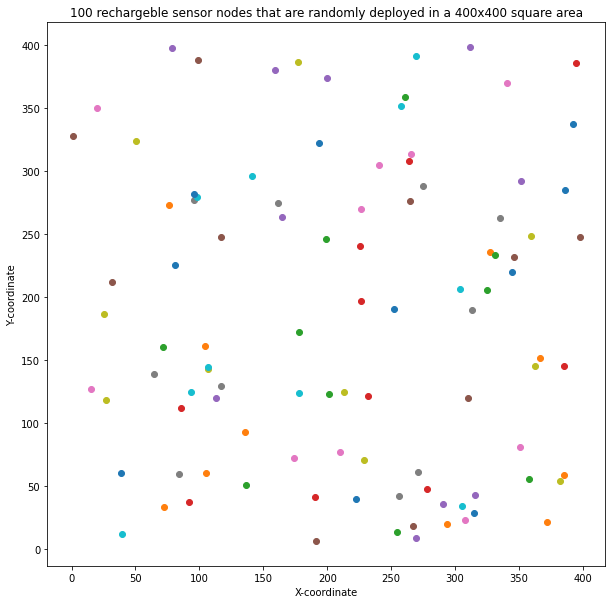

In [ ]:
area=400
sensors=set()
while len(sensors)<Sensor.total_sensors:
  x_coordinate=random.uniform(0,area)
  y_coordinate=random.uniform(0,area)
  req_charging=round(random.uniform(10,20))
  sensors.add(Sensor(x_coordinate,y_coordinate,req_charging))

plt.figure(figsize=(10, 10))
for items in sensors:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show() 


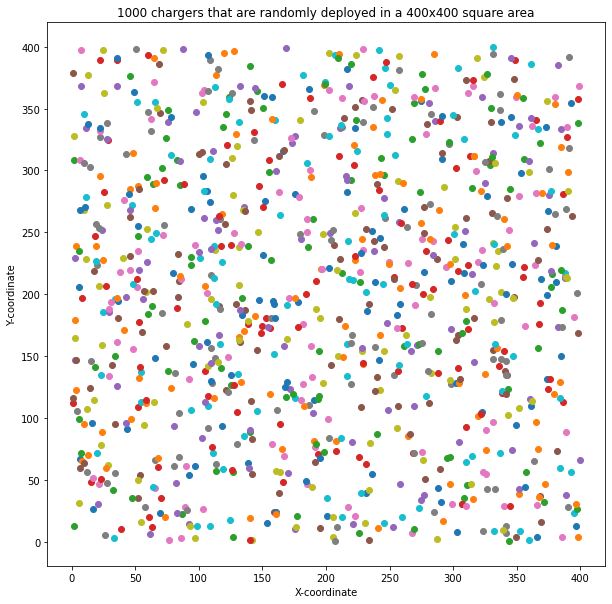

In [ ]:
chargers=set()
while len(chargers)<Charger.total_chargers:
    x=random.uniform(0,area)
    y=random.uniform(0,area)
    charger=Charger(x,y)
    chargers.add(charger)

plt.figure(figsize=(10, 10))
for items in chargers:
  plt.scatter(items.x, items.y) 
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{Charger.total_chargers} chargers that are randomly deployed in a {area}x{area} square area")
plt.show()   


In [ ]:
ans_chargers=set()
remained=Sensor.total_sensors

while Sensor.count_sensors<Sensor.total_sensors:
  m=-1
  for charger in chargers:
    L=0
    for item in sensors:
      if charger.check_dist(item) and item.curr_charging<item.req_charging:
        chr_level=charger.charging_level(item)
        if chr_level+item.curr_charging>item.req_charging:
          L+=item.req_charging-item.curr_charging
        else:  
          L+=chr_level

    if L>m:
      m=L
      nex=charger
  if len(chargers)==0 and Sensor.total_sensors>Sensor.count_sensors:
    print(f"not enough chargers:{Sensor.total_sensors-Sensor.count_sensors} sensors still remained to fulfill their required charging level")
    break
  ans_chargers.add(nex)
  for item in sensors:
    if nex.check_dist(item) and item.curr_charging<item.req_charging:
      L=nex.charging_level(item)
      if item.curr_charging+L>=item.req_charging:
        Sensor.count_sensors+=1
        item.curr_charging=item.req_charging
      else:
        item.curr_charging+=L
  chargers.discard(nex)
  if remained > (Sensor.total_sensors-Sensor.count_sensors):
    remained=Sensor.total_sensors-Sensor.count_sensors
    print(f"{remained} sensors remained , number of chargers {len(ans_chargers)}")

97 sensors remained , number of chargers 3
96 sensors remained , number of chargers 6
95 sensors remained , number of chargers 7
93 sensors remained , number of chargers 8
92 sensors remained , number of chargers 9
91 sensors remained , number of chargers 10
89 sensors remained , number of chargers 16
87 sensors remained , number of chargers 18
84 sensors remained , number of chargers 19
81 sensors remained , number of chargers 20
80 sensors remained , number of chargers 22
78 sensors remained , number of chargers 23
77 sensors remained , number of chargers 24
74 sensors remained , number of chargers 25
72 sensors remained , number of chargers 27
70 sensors remained , number of chargers 28
69 sensors remained , number of chargers 29
67 sensors remained , number of chargers 30
64 sensors remained , number of chargers 32
63 sensors remained , number of chargers 33
62 sensors remained , number of chargers 34
60 sensors remained , number of chargers 36
58 sensors remained , number of charg

number of chargers : 77


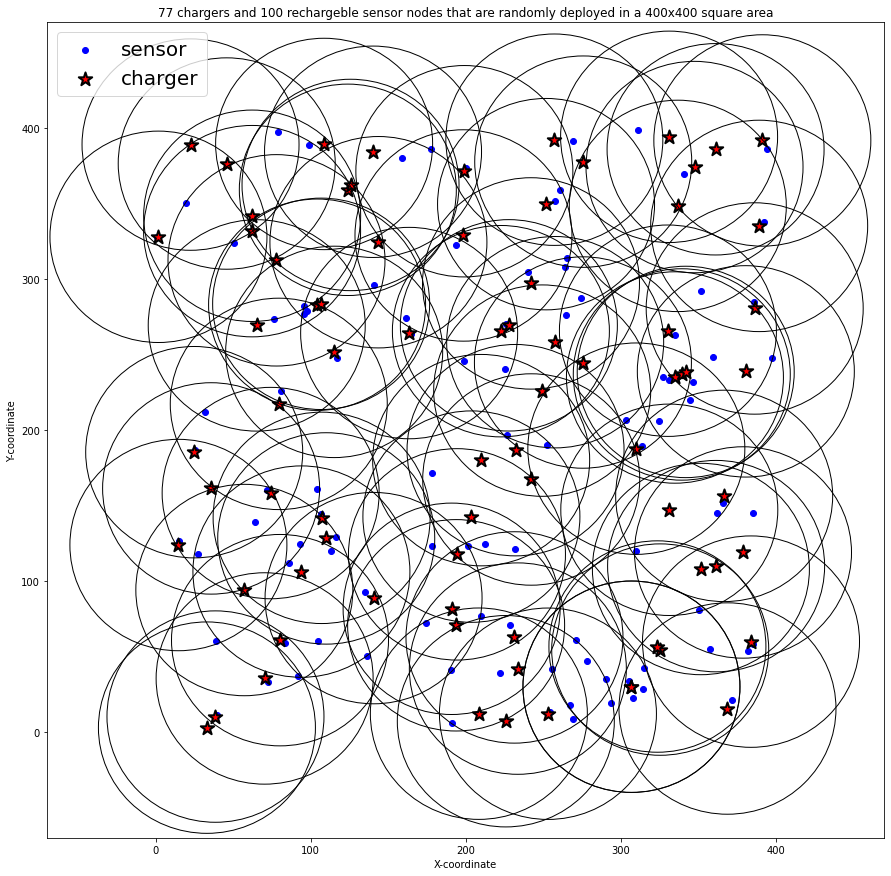

In [ ]:
print("number of chargers :",len(ans_chargers))

fig,ax = plt.subplots(figsize=(15, 15))
for items in sensors:
  plt1=plt.scatter(items.x, items.y,c='b') 


for item in ans_chargers:
  circle = plt.Circle((item.x, item.y),Charger.radius, fill=False,color="black")
  ax.add_patch(circle)
  plt2=plt.scatter(item.x,item.y, c ='r',linewidths = 2,edgecolor="black" ,marker ="*",s = 200)  

plt.legend([plt1,plt2],["sensor","charger"],prop={'size':20})
plt.axis([-(Charger.radius), area+Charger.radius, -(charger.radius),area+Charger.radius])
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate") 
plt.title(f"{len(ans_chargers)} chargers and {Sensor.total_sensors} rechargeble sensor nodes that are randomly deployed in a {area}x{area} square area")
plt.show()
